# SAB

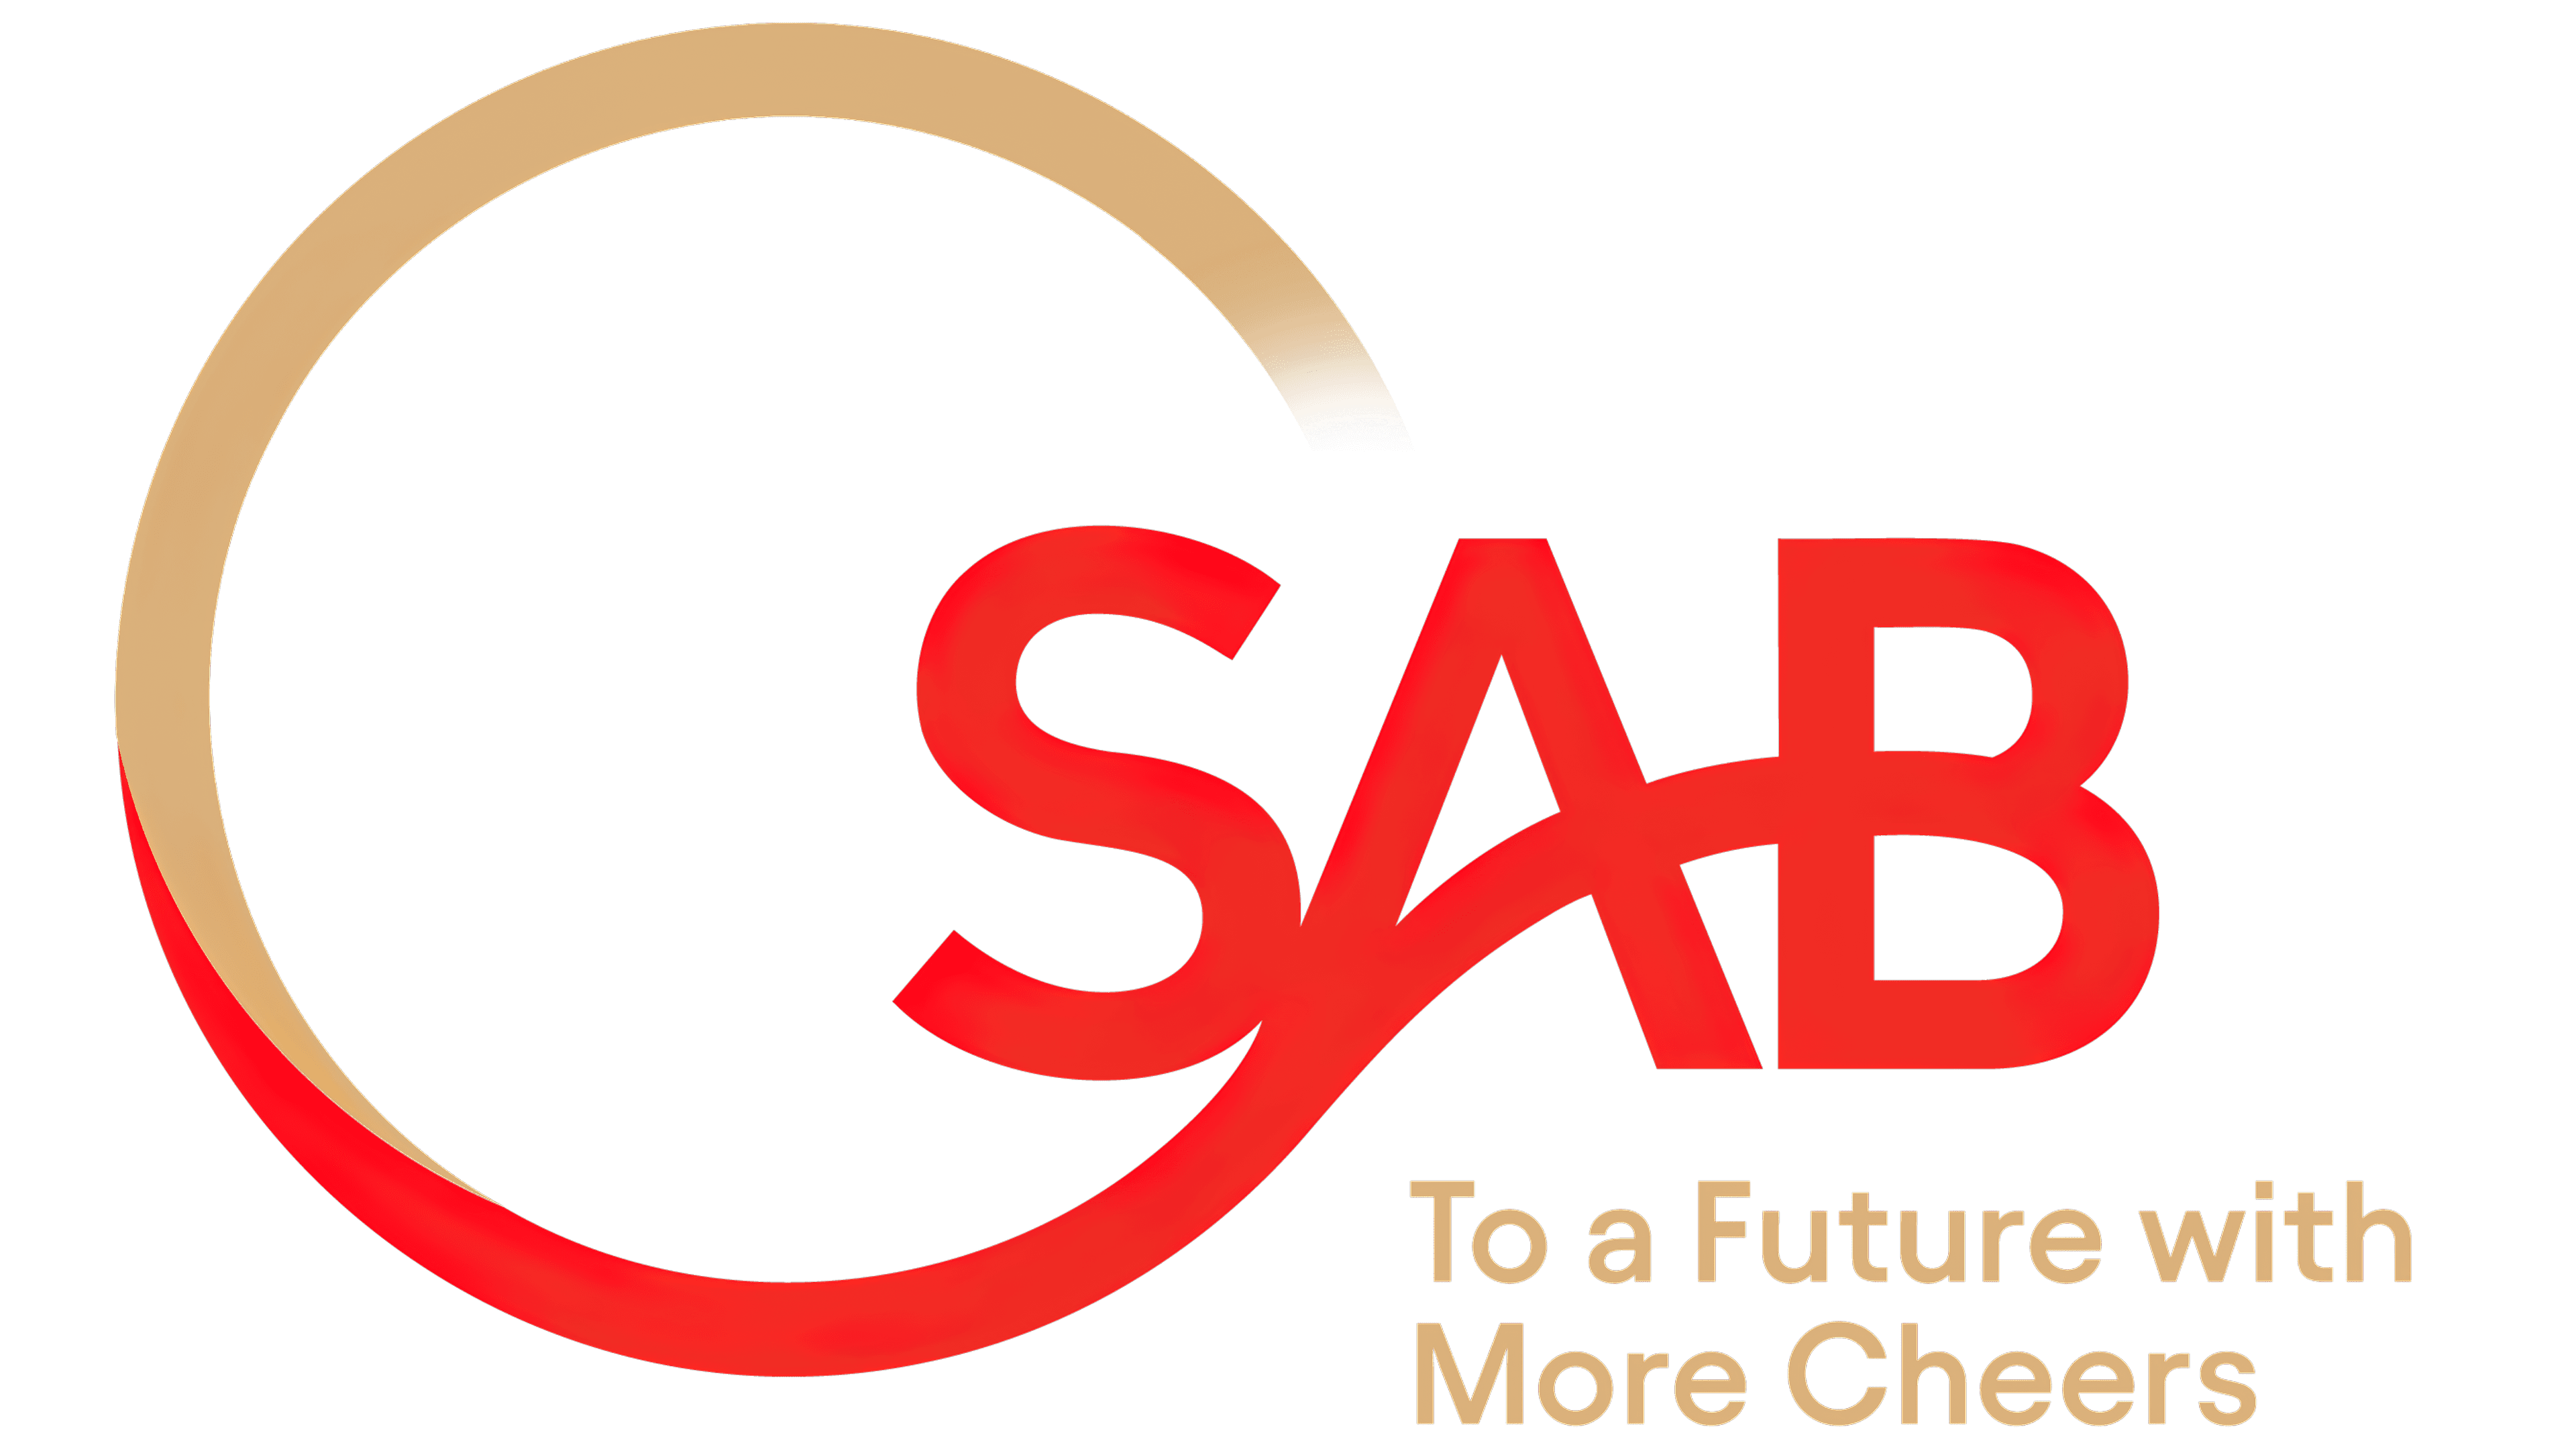

## Table of Contents

- [The Dataset](#Dataset-Overview)
- [Libraries Used](#Libraries)
- [Loading Dataset](#Loading-Dataset)
- [Data Cleaning](#Data-Preprocessing)
- [Data Exploration](#EDA)    
    - [Basic EDA](#Basic-EDA)      
    - [Features Exploration](#Features-Exploration) 
        - [Univariate Analysis](#Univariate-Analysis)
        - [Bivariate Analysis](#Bivariate-Analysis)
            - [Numerical Features EDA](#Numerical-Features-EDA)
            - [Categorical Features EDA](#Categorical-Features-EDA)
- [Model](#Define-The-Model)
- [Model Evaluation](#Model-Evaluation)


## Libraries Used

In [ ]:
#Data manipulation imports
import pandas as pd
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical imports
from scipy.stats import f_oneway, shapiro

#Model imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#Other imports
import calendar
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
data = pd.read_excel("Tech Stream Case Study_V3.xlsx")
data.head()

## Data Pre-Processing

In [ ]:
print(data.columns)

In [ ]:
print(data.isnull().any())

In [ ]:
print(data.duplicated().any())


## Basic EDA

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe().T

## Data Distribution

In [ ]:
cols = data.shape[1]
rows = (cols + 1) // 2

plt.figure(figsize=(12, 6 * rows))

for i, column in enumerate(data.columns):
    plt.subplot(rows, 2, i + 1)
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column].plot(kind='hist', density=True, bins=30, alpha=0.5)
        sns.kdeplot(data[column], color='red')
        plt.title(f"Distribution of {column} with KDE")
    else:
        data[column].value_counts().plot(kind='bar', alpha=0.7)
        plt.title(f"Count of {column}")
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

## Feature Exploration

### Temporal Analysis

In [ ]:
data['Year'] = pd.to_datetime(data['Year'])

data['year'] = data['Year'].dt.year
data['month'] = data['Year'].dt.month
data['day'] = data['Year'].dt.day
data['week_num'] = data['Year'].dt.isocalendar().week
data['day_of_week'] = data['Year'].dt.dayofweek
data['quarter'] = data['Year'].dt.quarter

data

In [ ]:
min_year = data['year'].min()
min_year

In [ ]:
max_year = data['year'].max()
max_year

#### Year

In [ ]:
year_counts = data['Year'].value_counts().drop_duplicates()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar') 
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Distribution')
plt.show()

In [ ]:
sales_year = data.groupby('year')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
bars = sales_year.plot(kind = 'bar')

for bar in bars.patches:
    plt.text(bar.get_x(), bar.get_width(), bar.get_height())

plt.title('Sales Variation by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('year')['Volume (hL)']])

print("ANOVA results for Year:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales across different years.")
else:
    print("There is no significant difference in sales across different years.")

#### Month

In [ ]:
data['month'] = data['month'].map({1: 'January', 2: 'February', 
                                 3: 'March', 4: 'April', 5: 'May', 
                                 6: 'June', 7: 'July', 8: 'August',
                                 9: 'September', 10: 'October', 
                                 11: 'November', 12: 'December'})

In [ ]:

month_counts = data['month'].value_counts()

plt.figure(figsize = (10, 8))
month_counts.plot(kind = 'bar')
plt.title("Month Distribution")
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

In [ ]:
sales_month = data.groupby('month')['Volume (hL)'].sum().reindex(month_order)

plt.figure(figsize=(12, 6))
bars = sales_month.plot(kind = 'bar')

for bar in bars.patches:
    plt.text(bar.get_x(), bar.get_width(), bar.get_height())

plt.title('Daily Sales Variation by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('month')['Volume (hL)']])

print("ANOVA results for Months:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales across different months.")
else:
    print("There is no significant difference in sales across different months.")

#### Week

In [ ]:
sales_week_num = data['week_num'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sales_week_num.plot(kind = 'bar')
plt.title('Week Distribution')
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sales_week = data.groupby('week_num')['Volume (hL)'].sum()

plt.figure(figsize=(10, 6))
bars = sales_week.plot(kind = 'bar')

for bar in bars.patches:
    plt.text(bar.get_x(), bar.get_width(), bar.get_height())

plt.title('Sales Variation by Week')
plt.xlabel('Week Number')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('week_num')['Volume (hL)']])

print("ANOVA results for Weeks in a Year:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales across different weeks.")
else:
    print("There is no significant difference in sales across different weeks.")

#### Day of Week

In [ ]:
data['day_of_week'] = data['day_of_week'].map({0: 'Monday', 1: 'Tuesday',
                                               2: 'Wednesday', 3: 'Thursday',
                                               4: 'Friday', 5: 'Saturday',
                                               6: 'Sunday'})


In [ ]:
day_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
            'Sunday']

In [ ]:
daily_sales_week = data['day_of_week'].value_counts().reindex(day_sort)

plt.figure(figsize=(12, 6))
daily_sales_week.plot(kind = 'bar')
plt.title('Day of Week Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
daily_sales_week = data.groupby('day_of_week')['Volume (hL)'].sum().reindex(day_sort)

plt.figure(figsize=(12, 6))
daily_sales_week.plot(kind = 'bar')
plt.title('Daily Sales Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('day_of_week')['Volume (hL)']])

print("ANOVA results for day of the week:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales across different days of the week.")
else:
    print("There is no significant difference in sales across different days of the week.")

#### Quarter

In [ ]:
data['quarter'] = data['quarter'].map({1: 'Qtr 1', 2: 'Qtr 2',
                                       3: 'Qtr 3', 4: 'Qtr 4'})

In [ ]:
quarter = data['quarter'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
quarter.plot(kind = 'bar')
plt.title('Quarter Distribution')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
quarter = data.groupby('quarter')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
quarter.plot(kind = 'bar')
plt.title('Sales Variation by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('quarter')['Volume (hL)']])

print("ANOVA results for Quarter:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by quarter of the year.")
else:
    print("There is no significant difference in sales by quarter of the year.")

In [ ]:
data = data.drop(columns=['Year'])
data

### Manufacturer Analysis

In [ ]:
man = data['Manufacturer'].unique()
man

In [ ]:
man_order = [
    'SAB', 'Competitor A', 'Competitor B', 'Competitor C', 'Others'
]

In [ ]:

manufacturer_counts = data['Manufacturer'].value_counts().reindex(man_order)

plt.figure(figsize = (10, 8))
manufacturer_counts.plot(kind = 'bar')
plt.title("Manufacturer Counts")
plt.ylabel("Count")
plt.xlabel("Manufacturer")
plt.show()

In [ ]:
pack_cat = data.groupby('Manufacturer')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
pack_cat.plot(kind = 'bar')
plt.title('Daily Sales Variation by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('Manufacturer')['Volume (hL)']])

print("ANOVA results for Manufacturer:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by Manufacturer.")
else:
    print("There is no significant difference in sales by Manufacturer.")

### Liquor Category Analysis

In [ ]:
liqcat_counts = data['Liquor Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
liqcat_counts.plot(kind = 'bar')
plt.xlabel('Liqour Category')
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

In [ ]:
pack_cat = data.groupby('Liquor Category')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
pack_cat.plot(kind = 'bar')
plt.title('Daily Sales Variation by Liquor Category')
plt.xlabel('Liquor Category')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('Liquor Category')['Volume (hL)']])

print("ANOVA results for Liquor Category:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by Liquor Category.")
else:
    print("There is no significant difference in sales by Liquor Categoy.")

### Brands Analysis

In [ ]:
brands_counts = data['Brands'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(brands_counts.index, brands_counts.values)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Brands Distribution')
plt.show()

In [ ]:
threshold = 50

brands_counts = data['Brands'].value_counts().sort_index()

filtered_brands_counts = brands_counts[brands_counts > threshold]

plt.figure(figsize=(10, 6))
plt.bar(filtered_brands_counts.index, filtered_brands_counts.values)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Brands Distribution')

plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.legend()

plt.xticks(rotation=45)
plt.show()

In [ ]:
threshold = 100

brands_counts = data['Brands'].value_counts().sort_index()

filtered_brands_counts = brands_counts[brands_counts > threshold]

plt.figure(figsize=(10, 6))
plt.bar(filtered_brands_counts.index, filtered_brands_counts.values)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Brands Distribution')

plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.legend()

plt.xticks(rotation=45)
plt.show()

In [ ]:
pack_cat = data.groupby('Brands')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
pack_cat.plot(kind = 'bar')
plt.title('Sales Variation by Brands')
plt.xlabel('Brands')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('Brands')['Volume (hL)']])

print("ANOVA results for Brands:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by Brands.")
else:
    print("There is no significant difference in sales by Brands.")

### Pack Information Analysis

#### Pack Size

In [ ]:
pack_size_counts = data['Pack Size'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
pack_size_counts.plot(kind = 'bar')
plt.xlabel('Pack Size')
plt.ylabel('Count')
plt.title('Pack Size Distribution')
plt.show()

In [ ]:
pack_cat = data.groupby('Pack Size')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
pack_cat.plot(kind = 'bar')
plt.title('Variation by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('Pack Size')['Volume (hL)']])

print("ANOVA results for Pack Size:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by Pack Size.")
else:
    print("There is no significant difference in sales by Pack Size.")

#### Pack Type

In [ ]:
pack_type_counts = data['Pack Type'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(pack_type_counts.index, pack_type_counts.values)
plt.xlabel('Pack Type')
plt.ylabel('Count')
plt.title('Pack Type Distribution')
plt.show()

In [ ]:
pack_cat = data.groupby('Pack Type')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
pack_cat.plot(kind = 'bar')
plt.title('Variation by Pack Type')
plt.xlabel('Pack Type')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('Pack Type')['Volume (hL)']])

print("ANOVA results for Pack Type:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by Pack Type.")
else:
    print("There is no significant difference in sales by Pack Type.")

#### Pack Category

In [ ]:
packcat_counts = data['Pack Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(packcat_counts.index, packcat_counts.values)
plt.xlabel('Pack Category')
plt.ylabel('Count')
plt.title('Pack Category Distribution')
plt.show()

In [ ]:
pack_cat = data.groupby('Pack Category')['Volume (hL)'].sum()

plt.figure(figsize=(12, 6))
pack_cat.plot(kind = 'bar')
plt.title('Variation by Pack Category')
plt.xlabel('Pack Category')
plt.ylabel('Total Volume Ordered')
plt.xticks(rotation=45)
plt.show()

In [ ]:
f_statistic, p_value = f_oneway(*[group for name, group in data.groupby('Pack Category')['Volume (hL)']])

print("ANOVA results for Pack Category:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in sales by Pack Category.")
else:
    print("There is no significant difference in sales by Pack Category.")

### Volume Analysis

In [ ]:
data['Manufacturer'] = data['Manufacturer'].astype('category')
data['Liquor Category'] = data['Liquor Category'].astype('category')
data['Brands'] = data['Brands'].astype('category')
data['Pack Type'] = data['Pack Type'].astype('category')
data['Pack Category'] = data['Pack Category'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['quarter'] = data['quarter'].astype('category')


data_encoded = pd.get_dummies(data, columns=['Manufacturer', 'Liquor Category', 'Brands', 'Pack Type', 'Pack Category', 'month', 'day_of_week', 'quarter'], drop_first=True)


X = data_encoded.drop('Volume (hL)', axis=1)
y = data_encoded['Volume (hL)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stat, p_value = shapiro(y)
print("Shapiro-Wilk test results:")
print("Statistic:", stat)
print("P-Value:", p_value)

alpha = 0.05

if p_value >= alpha:
    print('Volume (hL) is normally distributed. Suggested Model: Linear Regression.')

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    lin_reg_preds = lin_reg.predict(X_test)
    lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_preds))

    print(f'Linear Regression RMSE: {lin_reg_rmse:.2f}')

    lin_reg_cv_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    lin_reg_cv_rmse = np.sqrt(-lin_reg_cv_scores.mean())
    print(f'Linear Regression CV RMSE: {lin_reg_cv_rmse:.2f}')

else:
    print('Volume (hL) is not normally distributed.')

In [57]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_preds = rf_reg.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f'Random Forest RMSE: {rf_rmse:.2f}')

KeyboardInterrupt: 

In [ ]:

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores.mean())
print(f'Random Forest CV RMSE: {rf_cv_rmse:.2f}')


## Model

In [ ]:
''''
features = [
    'Year', 'Month', 'Manufacturer', 'Liquor Category', 'Brands', 'Pack Size', 'Pack Type', 
    'Pack Category', 'Price Tier', 'Region'
    ]

target = 'Volume (HL)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
''''

In [ ]:
''''
categorical_features = ['Month', 'Manufacturer', 'Liquor Category', 'Brands', 'Pack Size', 'Pack Type', 
    'Pack Category', 'Price Tier', 'Region']
numeric_features = ['Year']
''''

In [ ]:
''''
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features),
], remainder='passthrough')
''''

In [ ]:
''''
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}
''''

In [ ]:
''''
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
''''

### Model Evaluation

In [ ]:
''''
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"----- {name} -----")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")  
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R^2 Score: {r2:.4f}")
    print()
''''

The Random Forest Regressor outperforms the Linear Regression model in all metrics:
- Lower MAE and RMSE values indicate that the Random Forest model makes more accurate predictions with smaller errors.
- A higher R-squared value suggests that the Random Forest model explains a much larger portion of the variability in the target variable compared to the Linear Regression model.
In summary, the Random Forest Regressor provides a much better fit to the data and makes more accurate predictions than the Linear Regression model in this case.

# I am not going to pretend I like the model because I don't...we can improve it. 
### Please try to improve on it if you can.